<a href="https://colab.research.google.com/github/krmonline/AnomalyDetection/blob/master/Anomaly_Boxplots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import  pandas as pd
import matplotlib.pyplot as plt
import numpy as  np
import requests
import re
import seaborn as sns
from scipy.stats import norm

# ตัวอย่าง CPU

In [ ]:
cpu = pd.read_csv("https://raw.githubusercontent.com/numenta/NAB/master/data/realAWSCloudwatch/ec2_cpu_utilization_53ea38.csv")

1.766 1.866 0.10000000000000009


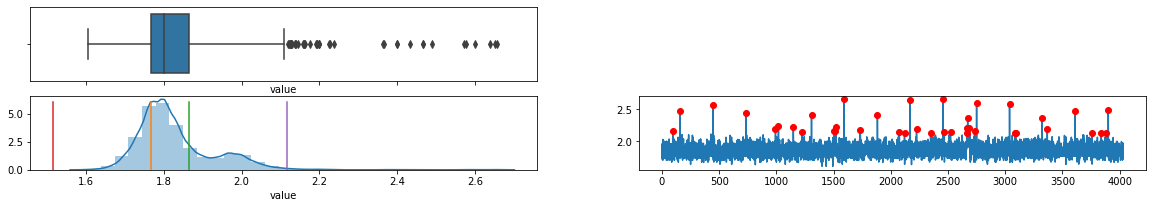

In [ ]:
f, axes = plt.subplots(2, 2,figsize=(20, 3),sharex='col')
sns.distplot(cpu.value,bins=30,ax=axes[1][0])
k = 2.5
sns.boxplot(x=cpu.value,ax=axes[0][0],whis=k)
q25, q75 = np.percentile(cpu.value, 25), np.percentile(cpu.value, 75)
iqr = q75 - q25
print(q25, q75,iqr)
loutlier  = q25 - k*iqr
uoutlier = q75 + k*iqr
axes[1][0].plot([q25,q25],[0,6])
axes[1][0].plot([q75,q75],[0,6])
axes[1][0].plot([loutlier,loutlier],[0,6])
axes[1][0].plot([uoutlier,uoutlier],[0,6])
axes[1][1].plot(cpu.value)
for  i in range(len(cpu.value)):
  if cpu.value.values[i] < loutlier or cpu.value.values[i] > uoutlier:
    #Remark Threshold
    axes[1][1].plot(i,cpu.value.values[i],'ro')
f.delaxes(axes[0][1])

# ตัวอย่าง PM 2.5

In [ ]:
url = 'http://berkeleyearth.lbl.gov/air-quality/maps/cities/Thailand/Bangkok/Bangkok.txt'
r = requests.get(url)
a = r.content.splitlines()
pm = []
for i in a[:]:
  tmp = re.split('\\\\t',str(i))
  if len(tmp) >= 7:
    pm.append(tmp)

In [ ]:
import warnings
warnings.filterwarnings("ignore")
Month_text  = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
df = pd.DataFrame(pm,columns=['Year', 'Month', 'Day', 'UTC Hour', 'PM2.5', 'PM10_mask', 'Retrospective'])

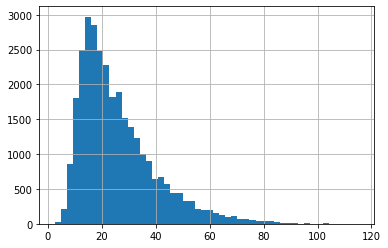

In [ ]:
df2 = df.astype({'Month': 'int32','PM2.5' : 'float'})
df2['PM2.5'].hist(bins=50)

Feb


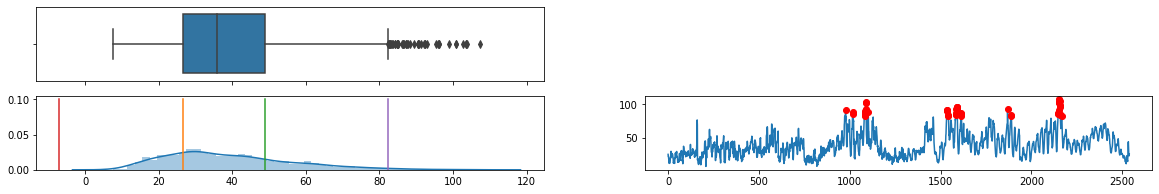

Mar


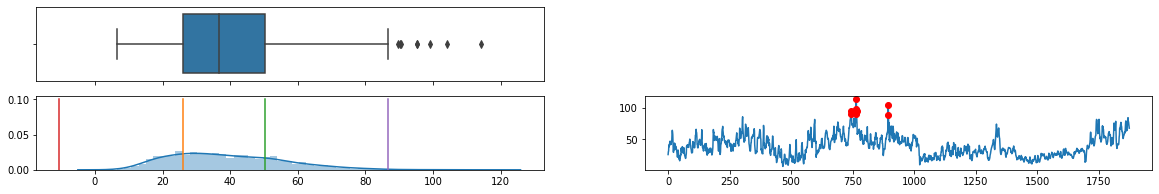

Apr


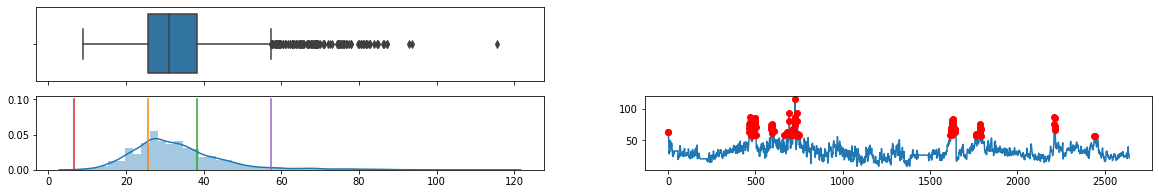

May


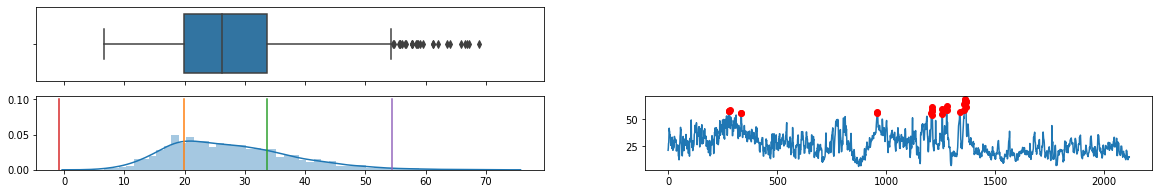

Jun


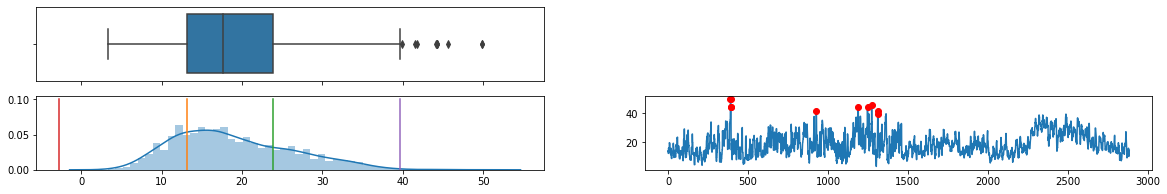

Jul


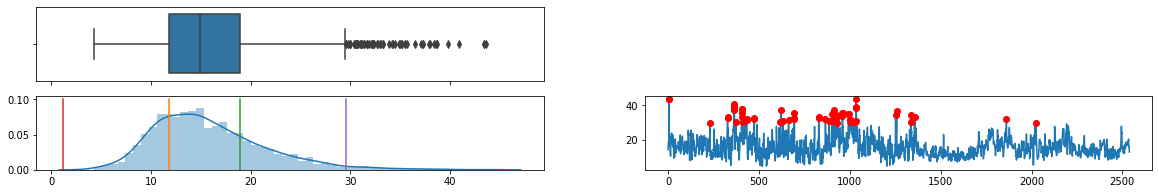

Aug


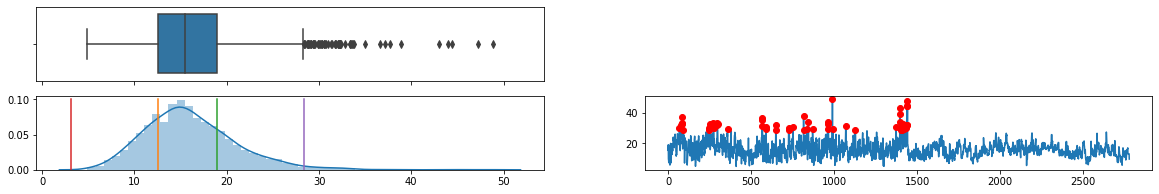

Sep


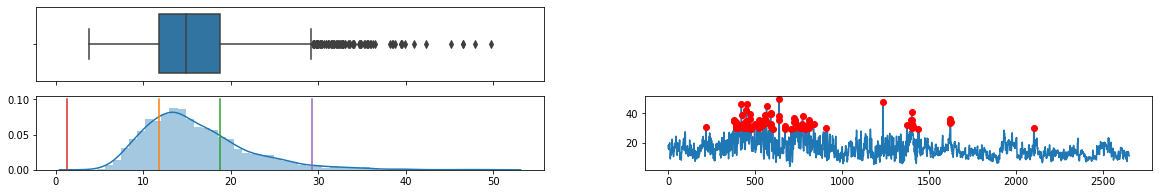

Oct


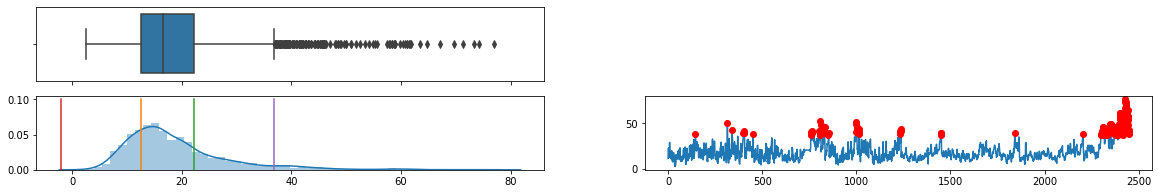

Nov


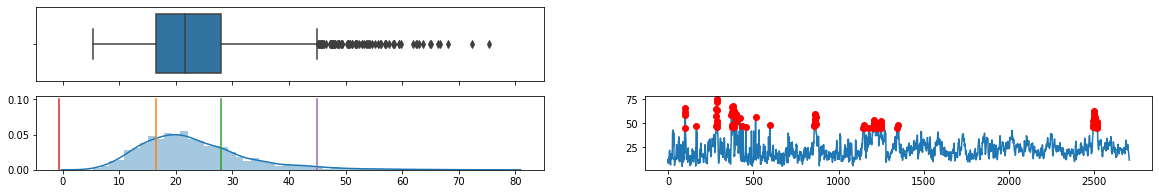

Dec


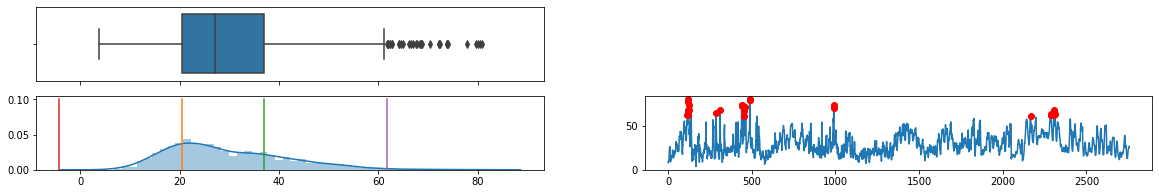

In [ ]:
for i in range(1,12):
  print(Month_text[i])
  pm2 = df2[df2.Month == i]['PM2.5']
  f, axes = plt.subplots(2, 2,figsize=(20, 3),sharex='col')
  sns.distplot(pm2.values,bins=50,ax=axes[1][0])
  arr_val = pm2.values
  q25, q75 = np.percentile(pm2.values, 25), np.percentile(pm2.values, 75)
  iqr = q75 - q25
  k = 1.5
  sns.boxplot(x=arr_val,ax=axes[0][0],whis=k)
  loutlier  = q25 - k*iqr
  uoutlier = q75 + k*iqr
  axes[1][0].plot([q25,q25],[0,0.1])
  axes[1][0].plot([q75,q75],[0,0.1]) 
  axes[1][0].plot([loutlier,loutlier],[0,0.1])
  axes[1][0].plot([uoutlier,uoutlier],[0,0.1])
  axes[1][1].plot(arr_val)
  for  i in range(len(arr_val)):
    if arr_val[i] > uoutlier or arr_val[i] < loutlier:
      axes[1][1].plot(i,arr_val[i],'ro')
  f.delaxes(axes[0][1])
  plt.show()